## Project Context and Motivation

Digital image processing (DIP) forms the foundation of many computer vision applications, long before the rise of machine learning. 
This project revisits classical approaches to image analysis and classification through a real-world use case: traffic sign classification.

In [104]:
import os
import sys
import random
import numpy as np 
import cv2
import matplotlib.pyplot as plt
sys.path.append('Image_processing/') 
import preprocessing as pr 

In [97]:
## data directories 
data_dir = r'Data\Train.csv' ## path to the csv file
test_dir = r'Data\Train' ## path to the test data directory
filtered_data_dir = r'Data\filtered_data.csv' ## path to the filtered data csv file
compiled_original_images_dir = r'images_by_label.npy' ## path to the compiled original images directory

### Class selection and image reading 

In [34]:
data_csv = np.genfromtxt(data_dir, delimiter=',', dtype=None, encoding=None) # read the csv file
data_csv[:1]

array([['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
        'ClassId', 'Path']], dtype='<U30')

In [35]:
data_csv

array([['Width', 'Height', 'Roi.X1', ..., 'Roi.Y2', 'ClassId', 'Path'],
       ['27', '26', '5', ..., '20', '20',
        'Train/20/00020_00000_00000.png'],
       ['28', '27', '5', ..., '22', '20',
        'Train/20/00020_00000_00001.png'],
       ...,
       ['58', '62', '5', ..., '57', '42',
        'Train/42/00042_00007_00027.png'],
       ['63', '69', '5', ..., '63', '42',
        'Train/42/00042_00007_00028.png'],
       ['68', '69', '7', ..., '63', '42',
        'Train/42/00042_00007_00029.png']], shape=(39210, 8), dtype='<U30')

In [36]:
#we are just using 6 unique classes for this 

column_7 = data_csv[:, 6] # get the 7th column of the csv file
unique_classes = np.unique(column_7) # get the unique classes in the 7th column

print("Unique classes in the 7th column: ", unique_classes) # print the unique classes

Unique classes in the 7th column:  ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9' 'ClassId']


run these lines to select different random classes to run the script on otherwise, keep them commented

In [ ]:
# # randomly select 6 unique classes from the unique classes
# selected_classes = random.sample(list(unique_classes), 6) # select 6 unique classes

In [ ]:
# selected_classes

[np.str_('33'),
 np.str_('26'),
 np.str_('24'),
 np.str_('9'),
 np.str_('0'),
 np.str_('4')]

In [ ]:
# ##saving the selected classes to a text file
# with open('selected_classes.txt', 'w') as f:
#     for item in selected_classes:
#         f.write("%s\n" % item)

In [59]:
selected_classes = np.genfromtxt('Data\\selected_classes.txt', dtype=str)

In [60]:
selected_classes 

array(['33', '26', '24', '9', '0', '4'], dtype='<U2')

In [91]:
# filter the data to only include the selected classes
filtered_data = data_csv[np.isin(data_csv[:, 6], selected_classes)] 
# removing the header row 
filtered_data = filtered_data[1:] 

In [92]:
np.unique(filtered_data[:,6]) # additional check to see if the filtered data has the selected classes

array(['0', '24', '26', '33', '4', '9'], dtype='<U30')

In [94]:
# we only need class ID and image path for the filtered data
filtered_data = filtered_data[:, -2:]
for row in filtered_data:
    print('\t'.join(row))

0	Train/0/00000_00000_00001.png
0	Train/0/00000_00000_00002.png
0	Train/0/00000_00000_00003.png
0	Train/0/00000_00000_00004.png
0	Train/0/00000_00000_00005.png
0	Train/0/00000_00000_00006.png
0	Train/0/00000_00000_00007.png
0	Train/0/00000_00000_00008.png
0	Train/0/00000_00000_00009.png
0	Train/0/00000_00000_00010.png
0	Train/0/00000_00000_00011.png
0	Train/0/00000_00000_00012.png
0	Train/0/00000_00000_00013.png
0	Train/0/00000_00000_00014.png
0	Train/0/00000_00000_00015.png
0	Train/0/00000_00000_00016.png
0	Train/0/00000_00000_00017.png
0	Train/0/00000_00000_00018.png
0	Train/0/00000_00000_00019.png
0	Train/0/00000_00000_00020.png
0	Train/0/00000_00000_00021.png
0	Train/0/00000_00000_00022.png
0	Train/0/00000_00000_00023.png
0	Train/0/00000_00000_00024.png
0	Train/0/00000_00000_00025.png
0	Train/0/00000_00000_00026.png
0	Train/0/00000_00000_00027.png
0	Train/0/00000_00000_00028.png
0	Train/0/00000_00000_00029.png
0	Train/0/00000_00001_00000.png
0	Train/0/00000_00001_00001.png
0	Train/

In [79]:
# saving the new csv file with the filtered data

np.savetxt(filtered_data_dir, filtered_data, delimiter=',', fmt='%s') # save the filtered data to a new csv file

In [80]:
filtered_data

array([['0', 'Train/0/00000_00000_00001.png'],
       ['0', 'Train/0/00000_00000_00002.png'],
       ['0', 'Train/0/00000_00000_00003.png'],
       ...,
       ['33', 'Train/33/00033_00022_00027.png'],
       ['33', 'Train/33/00033_00022_00028.png'],
       ['33', 'Train/33/00033_00022_00029.png']],
      shape=(5218, 2), dtype='<U30')

## Preprocessing the images

In [106]:
images = np.load(compiled_original_images_dir, allow_pickle=True).item() # load the compiled original images directory

In [107]:
images

{np.int64(0): [{'path': np.str_('Train/0/00000_00000_00002.png'),
   'image': array([[[ 72,  72,  72],
           [ 79,  79,  79],
           [ 73,  78,  78],
           ...,
           [ 71,  81,  78],
           [ 73,  79,  72],
           [ 64,  66,  63]],
   
          [[ 68,  68,  66],
           [ 74,  75,  77],
           [ 86,  87,  94],
           ...,
           [ 87,  93, 108],
           [ 77,  80,  77],
           [ 74,  75,  74]],
   
          [[ 69,  69,  65],
           [ 71,  71,  76],
           [101,  98, 112],
           ...,
           [ 91,  87, 120],
           [ 74,  74,  74],
           [ 67,  69,  69]],
   
          ...,
   
          [[117, 133, 146],
           [114, 130, 143],
           [119, 127, 140],
           ...,
           [ 75,  76,  75],
           [ 75,  75,  72],
           [ 77,  76,  73]],
   
          [[113, 121, 114],
           [107, 116, 115],
           [107, 111, 115],
           ...,
           [ 73,  73,  71],
           [ 80,  81, 

In [108]:
## applying the filter to the images 
filters = {
    'mean': pr.mean_filter,
    'gaussian': lambda img: pr.gaussian_filter(img, sigma=1.0),
    'median': pr.median_filter,
    'adaptive_median': pr.adaptive_median_filter,
    'unsharp': pr.unsharp_mask
}
processed_images = {}

for label, image_list in images.items():
    processed_images[label] = {}
    for filter_name, filter_fn in filters.items():
        processed_images[label][filter_name] = []  # list of processed images
        for entry in image_list:
            original_img = entry['image']
            filtered_img = filter_fn(original_img)
            processed_images[label][filter_name].append({
                'path': entry['path'],
                'filtered_image': filtered_img
            })

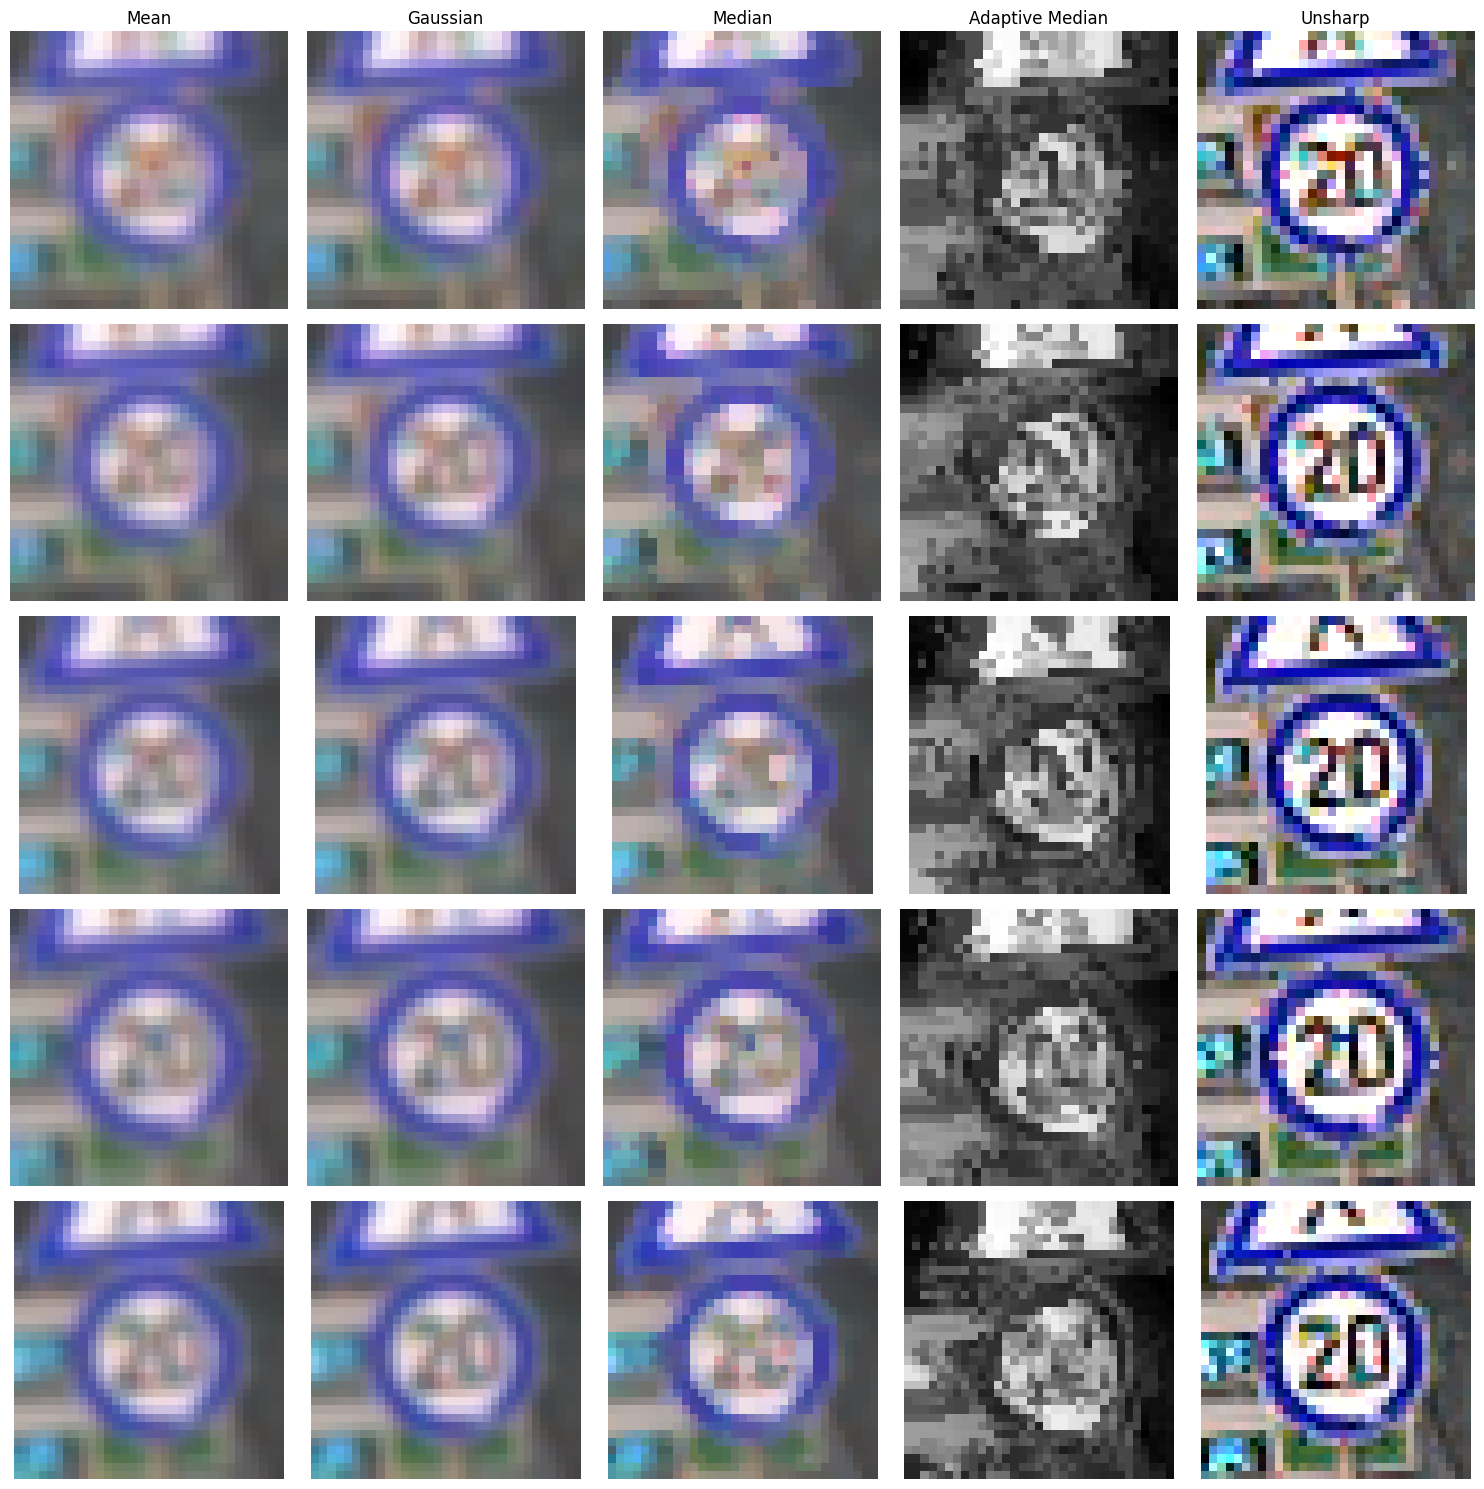

In [ ]:
label = 0  # Class label (string if your dictionary uses strings as keys)
sample_indices = [0, 1, 2, 3, 4]  # Example: show first 5 images of class '0'
filter_names = ['mean', 'gaussian', 'median', 'adaptive_median', 'unsharp']

rows = len(sample_indices)
cols = len(filter_names)

plt.figure(figsize=(cols * 3.5, rows * 3.5))

for row_idx, img_idx in enumerate(sample_indices):
    for col_idx, fname in enumerate(filter_names):
        filtered_img = processed_images[label][fname][img_idx]['filtered_image']
        image_path = processed_images[label][fname][img_idx]['path']
        image_name = image_path.split('/')[-1]  # Get just the filename

        plt_idx = row_idx * cols + col_idx + 1
        plt.subplot(rows, cols, plt_idx)

        # Handle RGB or grayscale
        if filtered_img.ndim == 3 and filtered_img.shape[2] == 3:
            plt.imshow(filtered_img.astype(np.uint8))
        else:
            plt.imshow(filtered_img, cmap='gray')

        # Titles for top row
        if row_idx == 0:
            plt.title(fname.replace('_', ' ').title(), fontsize=10)

        # Labels for bottom of each subplot
        plt.xlabel(f"Image {img_idx} – {image_name}", fontsize=8)
        plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()